In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Add noise to the input images


noise_factor = 0.5
#Add random noise to the training data using noise_factor
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
#Add random noise to the test data using the same noise_factor
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# Clip the values of the noisy training data to the range of 0 to 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
# Clip the values of the noisy test data to the range of 0 to 1
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
# Reshape the input images to (28, 28, 1)

#Reshaping the (train,test) and nosiy train and noisy test data to have dimensions of (28,28,1)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))


Q3) PART C - THE BELOW BLOCK OF CODE IS FOR THE CONVOLUTION AUTO ENCODER (CAE)

In [ ]:
input_shape = (28, 28, 1)

#Adding convultion layer followed by maxpooling layer then again convolution layer and then upsampling layer and a final convolution layer with a sigmoid activation

inputs = tf.keras.Input(shape=input_shape)
encoded = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
decoded = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

In [ ]:
#Insantaite the AutoEncoder Model
autoencoder = tf.keras.Model(inputs, decoded)
#Compile this model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#Train the autoencoder using the fit method
batch_size = 128
epochs = 100

history = autoencoder.fit(x_train_noisy, x_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_test_noisy, x_test))


Epoch 1/100
469/469 [==============================] - 13s 5ms/step - loss: 0.1753 - val_loss: 0.1123
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1112 - val_loss: 0.1090
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1088 - val_loss: 0.1071
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1071 - val_loss: 0.1062
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1058 - val_loss: 0.1047
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1046 - val_loss: 0.1034
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1036 - val_loss: 0.1028
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1028 - val_loss: 0.1020
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1022 - val_loss: 0.1013
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1017 - val_l

In [ ]:
# Report the loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
#printing the training and the validation loss
print("Train Loss:", train_loss[-1])
print("Validation Loss:", val_loss[-1])


Train Loss: 0.09749934822320938
Validation Loss: 0.09699416160583496


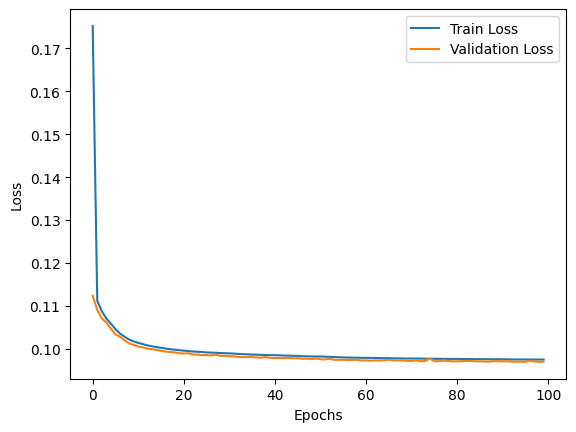

In [ ]:
# Plot the loss curve
import matplotlib.pyplot as plt

plt.plot(range(epochs), train_loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Add noise to the test images
noise_factor = 0.5
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Reshape the test images to (28, 28, 1)
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))

In [ ]:
# Generate reconstructed images by passing noisy images through the autoencoder
reconstructed_images = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 1ms/step


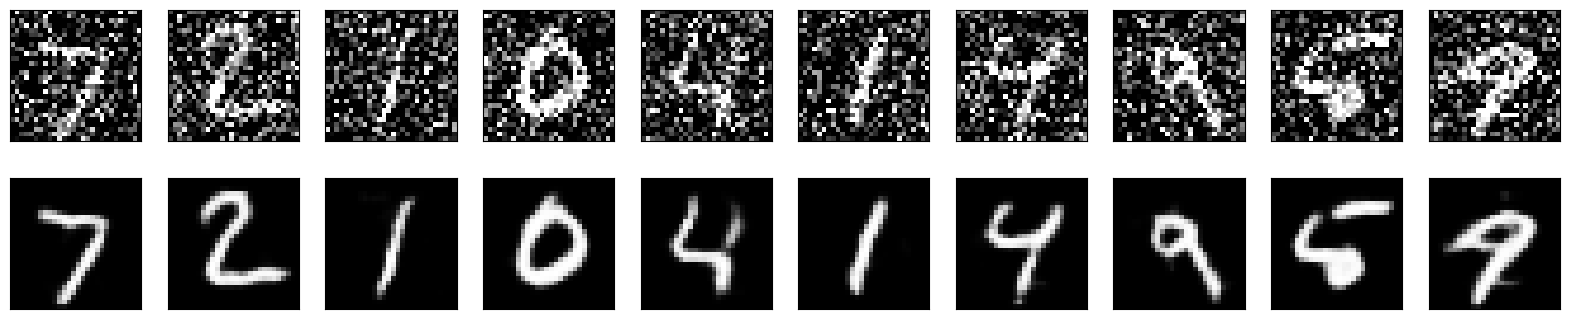

In [ ]:
# Display some sample results
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Q3) PART A & B - BELOW CODE BLOCKS ARE FOR THE PART A & B IN Q3 (DENOISING AUTOENCODER ) .
THIS IS THE DENIOSING AUTOENCODER WITHOUT THE CONVOLUTION LAYERS BECAUSE IN PART C WE HAD TO ADD CONVOLUTION LAYERS OTHERWISE IT WOULD HAVE BEEN THE SAME .
IN MANY CASES DENOSING AUTOENCODER HAS CONVOLUTION LAYERS ASSOCIATED WITH IT THOUGH.

In [ ]:
# Flatten the input images
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_noisy_flat = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy_flat = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))


In [ ]:
#Define the denoising autoencoder architecture with dense layers
input_dim = 784
encoding_dim = 32

#Adding only dense layers this time around for comparison of results wuth the previous case
inputs = tf.keras.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(inputs)
decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoded)

#Instantiate teh AutoEncoder model for this particular case and then call the compile method on it
autoencoder1 = tf.keras.Model(inputs, decoded)
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
# Train the denoising autoencoder
batch_size = 128
epochs = 100

history1 = autoencoder1.fit(x_train_noisy_flat, x_train_flat,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_test_noisy_flat, x_test_flat))



Epoch 1/100
469/469 [==============================] - 3s 3ms/step - loss: 0.2408 - val_loss: 0.1843
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1702 - val_loss: 0.1562
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1491 - val_loss: 0.1413
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1387 - val_loss: 0.1342
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1336 - val_loss: 0.1309
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1312 - val_loss: 0.1294
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1301 - val_loss: 0.1287
Epoch 8/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1295 - val_loss: 0.1285
Epoch 9/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1292 - val_loss: 0.1281
Epoch 10/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1289 - val_lo

In [ ]:
# Report the loss
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']


#Printing the loss
print("Train Loss:", train_loss[-1])
print("Validation Loss:", val_loss[-1])


Train Loss: 0.12525157630443573
Validation Loss: 0.12485367059707642


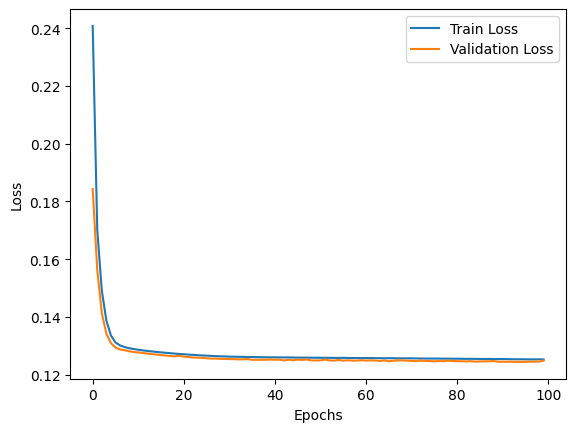

In [ ]:
# Plot the loss curve
plt.plot(range(epochs), train_loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 0s 1ms/step


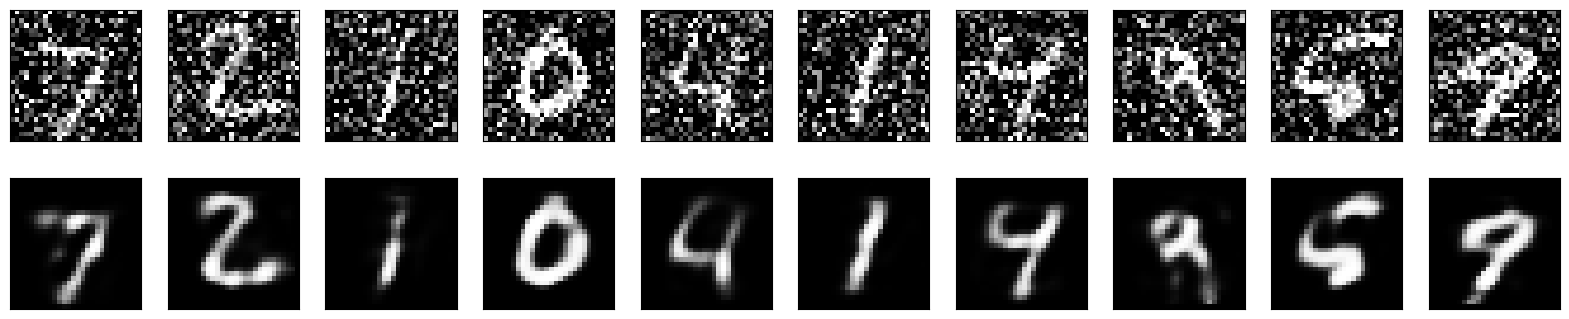

In [ ]:
# Generate reconstructed images using the trained model
reconstructed_images1 = autoencoder1.predict(x_test_noisy_flat)

# Display some sample results
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**AS WE CAN OBSERVE THE CAE DOES A BETTER JOB FOR THE RECONSTRUCTED IMAGES BECAUSE OF THE CONVOLUTION LAYERS IN THEM . THE RECONSTRUCTED IMAGES IN THE CAE ARE MUCH CLEARER AND ALSO HAVE A BETTER RESOLUTION.**